In [4]:
!pip install selenium #install selenium module for webscraping

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 40.6 MB/s eta 0:00:00


In [5]:
from selenium import webdriver #controls the browser( in this case, Chrome)
from selenium.webdriver.common.by import By #used to identigy web elements such as class name,tag name
from selenium.webdriver.common.keys import Keys #used to interect with the keyboard
import time #for adding delays

In [6]:
driver = webdriver.Chrome() #works on Jupyter notebook

SessionNotCreatedException: Message: session not created: probably user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir
Stacktrace:
#0 0x57027487053a <unknown>
#1 0x57027436bf00 <unknown>
#2 0x5702743a2c53 <unknown>
#3 0x57027439f4b6 <unknown>
#4 0x5702743ec7b6 <unknown>
#5 0x5702743ebe06 <unknown>
#6 0x5702743e0343 <unknown>
#7 0x5702743ad78a <unknown>
#8 0x5702743ae9de <unknown>
#9 0x57027483a2cb <unknown>
#10 0x57027483e242 <unknown>
#11 0x5702748277ac <unknown>
#12 0x57027483edf7 <unknown>
#13 0x57027480bb2f <unknown>
#14 0x57027485f1a8 <unknown>
#15 0x57027485f370 <unknown>
#16 0x57027486f3b6 <unknown>
#17 0x7f03726adac3 <unknown>


In [7]:
!pip install beautifulsoup4 requests #importing the Beutifulsoup library

In [19]:
from bs4 import BeautifulSoup #parsing the webpage content
import requests #to send HTTP requests to retreive content
import csv #to save the scraped data into a CSV file
import time

In [9]:
url = "https://www.bbc.com/news" #url of site we want to scrap
response = requests.get(url) #sends a GET request to the website

if response.status_code == 200:
  print("Page fetched succesfully!") # Status code 200 implies the response was successful
else:
  print("Failed to fetch the page. Status code: ",response.status_code)  # if any other status codes, the fetch was unsuccessful

Page fetched succesfully!


In [20]:
soup = BeautifulSoup(response.text, 'html.parser') #for parsing the HTML content using BeautifulSoup
print(soup.prettify()[:500]) #to show the first 500 characters of the HTML

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Home - BBC News
  </title>
  <meta content="Home - BBC News" property="og:title"/>
  <meta content="Home - BBC News" name="twitter:title"/>
  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, busine


In [11]:
#Example html element : <h2 data-testid="card-headline" class="sc-8ea7699c-3 dhclWg">OpenAI says Chinese rivals using its work for their AI apps<!-- --></h2>

# Find all headlines based on the tag(h2) and attribute (data-testid="card-headline")
headlines = soup.find_all('h2', attrs={'data-testid': 'card-headline'})

print("BBC News Headlines: \n")
# Loop through the extracted elements
for headline in headlines:
    print(headline.text.strip())  # Extract and print the text content of the headlines


BBC News Headlines: 

Authorities say at least 30 dead in Kumbh Mela crowd crush
'It's absolute chaos': At the scene of Kumbh Mela crush
In pictures: Welcoming the Lunar New Year
Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing
Pentagon strips Gen Mark Milley of US security detail and clearance
'It's absolute chaos': At the scene of Kumbh Mela crush
Trump offers millions of federal workers eight months of pay to resign
Ukrainian drone strike hits second Russian oil refinery in a week
Australian feared dead in captivity is still alive, Russia says
In pictures: Welcoming the Lunar New Year
'Don't overdo it, Steve': BBC journalist in testy exchange with Belarus president
Ontario's 'Captain Canada' calls snap election as Trump tariff threat looms
Australian police find explosives for possible antisemitic attack
OpenAI says Chinese rivals using its work for their AI apps
UK finance minister backs expansion of London's Heathrow Airport
Roman Abramovich could owe

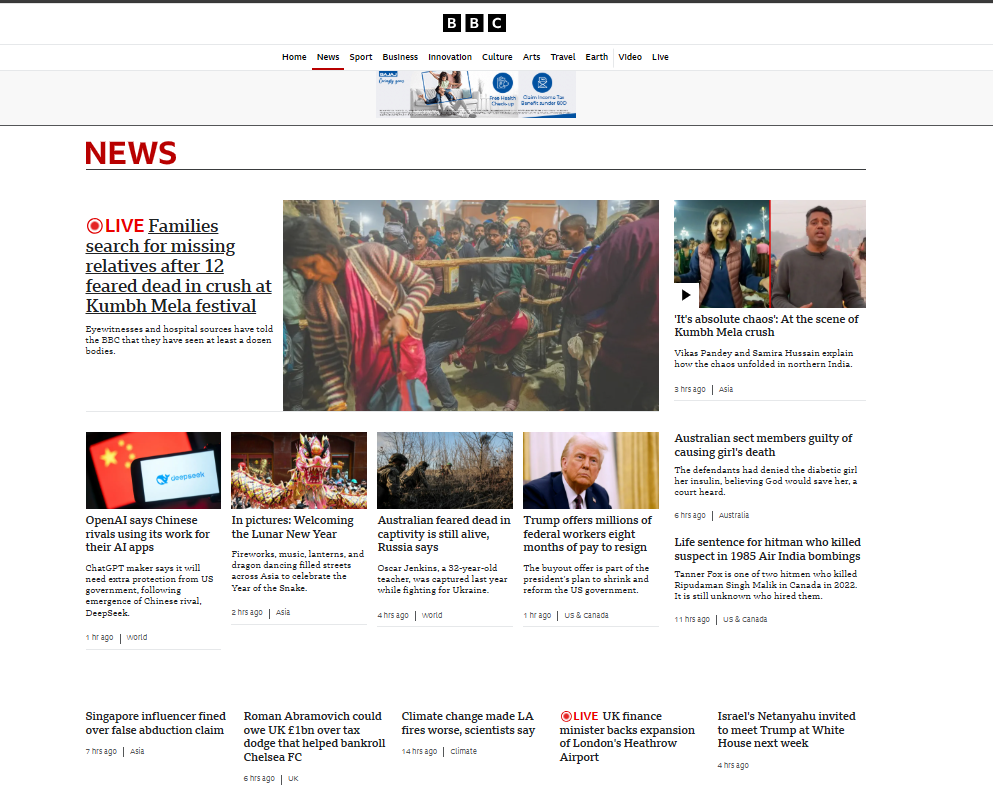

In [28]:
from bs4 import BeautifulSoup
import requests
import time

url = "https://www.bbc.com/news" # URL of the site to scrape
response = requests.get(url)  # Send GET request to the website

if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print("Failed to fetch the page. Status code: ", response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

headlines = soup.find_all('h2', attrs={'data-testid': 'card-headline'})

print("BBC News Headlines: \n")

for headline in headlines:
    headline_text = headline.text.strip()
    link_tag = headline.find_parent('a')  # Find the parent <a> tag to get the article link

    if not link_tag:
        continue  # Skip the article if there's no link or it's empty

    link = link_tag['href']  # Get the relative link

    if not link.startswith("http"): # If the link does not start with 'http', add the base URL
        link = "https://www.bbc.com" + link  # Construct the full URL

    article_response = requests.get(link) # Fetch the article page to check for media content
    article_soup = BeautifulSoup(article_response.text, 'html.parser')

    # Check if the article contains video or image content
    video_tag = article_soup.find('video')  # Check for <video> tags
    image_tag = article_soup.find('img')  # Check for <img> tags

    if video_tag or image_tag:
        print(f"Skipping article with media content: {headline_text}")  # Skip articles that contain video or image content
        continue

    print(f"Scraped: {headline_text}\n")

    time.sleep(2)  # Pause to avoid overwhelming the server

print("Scraping complete!")


Page fetched successfully!
BBC News Headlines: 

Skipping article with media content: Authorities say at least 30 dead in Kumbh Mela crowd crush
Skipping article with media content: 'It's absolute chaos': At the scene of Kumbh Mela crush
Skipping article with media content: In pictures: Welcoming the Lunar New Year
Scraped: Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing

Skipping article with media content: Pentagon strips Gen Mark Milley of US security detail and clearance
Skipping article with media content: 'It's absolute chaos': At the scene of Kumbh Mela crush
Skipping article with media content: Trump offers millions of federal workers eight months of pay to resign
Skipping article with media content: My criticism of Trump was wrong, says UK's incoming ambassador to US
Skipping article with media content: Australian feared dead in captivity is still alive, Russia says
Skipping article with media content: In pictures: Welcoming the Lunar New Year
Sk

The above version only scrapes the headlines; no detailed article data or summaries are retrieved

In [29]:
from bs4 import BeautifulSoup
import requests
import time

url = "https://www.bbc.com/news"
response = requests.get(url)

if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print("Failed to fetch the page. Status code: ", response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

headlines = soup.find_all('h2', attrs={'data-testid': 'card-headline'})

print("BBC News Headlines: \n")

for headline in headlines:
    headline_text = headline.text.strip()
    link_tag = headline.find_parent('a')

    if not link_tag:
        continue

    link = link_tag['href']

    if not link.startswith("http"):
        link = "https://www.bbc.com" + link

    article_response = requests.get(link)
    article_soup = BeautifulSoup(article_response.text, 'html.parser')

    video_tag = article_soup.find('video')
    image_tag = article_soup.find('img')

    if video_tag or image_tag:
        print(f"Skipping article with media content: {headline_text}")
        continue

    summary_tag = article_soup.find('meta', attrs={'name': 'description'})   #Extract the summary from the article

    if summary_tag and summary_tag.get('content'):
        summary = summary_tag['content']     # If there's a meta description, use it as the summary
    else:
        summary_tag = article_soup.find('p')
        summary = summary_tag.text.strip() if summary_tag else "No summary available" # If no meta description, fallback to the first <p> tag

    print(f"Scraped: {headline_text}") # Save the data
    print(f"Summary: {summary}\n")

    data = []
    data.append({'headline': headline_text, 'summary': summary})

    time.sleep(2)

print("Scraping complete!")


Page fetched successfully!
BBC News Headlines: 

Skipping article with media content: Authorities say at least 30 dead in Kumbh Mela crowd crush
Skipping article with media content: 'It's absolute chaos': At the scene of Kumbh Mela crush
Skipping article with media content: In pictures: Welcoming the Lunar New Year
Scraped: Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing
Summary: In a scathing letter, Caroline Kennedy urges US senators not to confirm her cousin for a top health job.

Skipping article with media content: Pentagon strips Gen Mark Milley of US security detail and clearance
Skipping article with media content: 'It's absolute chaos': At the scene of Kumbh Mela crush
Skipping article with media content: Trump offers millions of federal workers eight months of pay to resign
Skipping article with media content: My criticism of Trump was wrong, says UK's incoming ambassador to US
Skipping article with media content: Australian feared dead in capti

ABove version expands the functionality by scraping not just the headlines, but also the full article summaries. It checks whether the article has any media content (video or images) and skips those articles, ensuring that only articles without media content are scraped.


In [36]:
import requests
from bs4 import BeautifulSoup
import time

url = "https://www.bbc.com/news"
response = requests.get(url)

if response.status_code == 200:
    print("Page fetched successfully!")

    soup = BeautifulSoup(response.text, 'html.parser')

    headlines = soup.find_all('h2', attrs={'data-testid': 'card-headline'})

    print("\nBBC News Headlines: \n")

    for headline in headlines:
        headline_text = headline.text.strip()
        link_tag = headline.find_parent('a')

        if link_tag:
            link = link_tag.get('href')

            if not link.startswith("http"):
                link = "https://www.bbc.com" + link

            article_response = requests.get(link)
            article_soup = BeautifulSoup(article_response.text, 'html.parser')

            video_tag = article_soup.find('video')
            image_tag = article_soup.find('img')

            if video_tag or image_tag:
                continue

            summary = None

            summary_tag = article_soup.find('meta', attrs={'name': 'description'})
            if summary_tag and summary_tag.get('content'):
                summary = summary_tag['content']

            if not summary:
                summary_tag = article_soup.find('p')
                if summary_tag:
                    summary = summary_tag.text.strip()

            if not summary:
                summary_tag = article_soup.find('div', {'class': 'story-body__inner'})
                if summary_tag:
                    summary_paragraphs = summary_tag.find_all('p')
                    summary = " ".join([p.text.strip() for p in summary_paragraphs[:2]])  # Take first two paragraphs

            # If no summary is found, set a default message
            if not summary:
                summary = "No summary available"

            # Print the headline and summary
            print(f"Scraped: {headline_text}")
            print(f"Summary: {summary}\n")
            time.sleep(2)


Page fetched successfully!

BBC News Headlines: 

Scraped: Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing
Summary: In a scathing letter, Caroline Kennedy urges US senators not to confirm her cousin for a top health job.

Scraped: Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing
Summary: In a scathing letter, Caroline Kennedy urges US senators not to confirm her cousin for a top health job.



it improves the filtering of media-heavy articles, making the scraping process more focused on text content, but limits it to only include content in the main page

In [37]:
from bs4 import BeautifulSoup
import requests
import csv
import time

url = "https://www.bbc.com/news"
response = requests.get(url)

if response.status_code == 200:
    print("Page fetched successfully!")
else:
    print("Failed to fetch the page. Status code: ", response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify()[:500])

headlines = soup.find_all('h2', attrs={'data-testid': 'card-headline'})

print("BBC News Headlines: \n")

for headline in headlines:
    print(headline.text.strip())
articles = soup.find_all('h2', attrs={'data-testid': 'card-headline'})
data = []

for article in articles:
    headline = article.text.strip()
    link_tag = article.find_parent('a')

    if link_tag:
        # Correcting the URL construction by ensuring "https://" is properly added
        link = link_tag['href'] if link_tag['href'].startswith('https://') else "https://www.bbc.com" + link_tag['href']
        article_response = requests.get(link)  # Fetch the article page
        article_soup = BeautifulSoup(article_response.text, 'html.parser')  # Parse the article page content

        summary_tag = article_soup.find('p', {'class': 'sc-eb7bd5f6-0 fYAfXe'}) # Try to find the summary inside the <p> tag with the identified class

        summary = summary_tag.text.strip() if summary_tag else "No summary available"

        data.append({'headline': headline, 'summary': summary})

        print(f"Scraped: {headline}")
        print(f"Summary: {summary}\n")

        time.sleep(2)


Page fetched successfully!
<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Home - BBC News
  </title>
  <meta content="Home - BBC News" property="og:title"/>
  <meta content="Home - BBC News" name="twitter:title"/>
  <meta content="Visit BBC News for up-to-the-minute news, breaking news, video, audio and feature stories. BBC News provides trusted World and UK news as well as local and regional perspectives. Also entertainment, busine
BBC News Headlines: 

Trump's health secretary pick and vaccine sceptic RFK Jr faces Senate grilling
Thirty killed in crowd crush at India's Kumbh Mela festival
In pictures: Welcoming the Lunar New Year
Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing
Pentagon strips Gen Mark Milley of US security detail and clearance
Thirty killed in crowd crush at India's Kumbh Mela festival
Trump offers incentives to US federal workers to quit jobs
My 

- Extracts headlines and corresponding summaries from BBC News.
- Handles relative URLs by converting them to absolute URLs.
- Includes error handling for missing summaries.
- Pauses between requests to respect server limits.

In [39]:
import csv

data = [
    {"headline": "Trump's health secretary pick and vaccine sceptic RFK Jr faces Senate grilling", "summary": "No summary available"},
    {"headline": "Thirty killed in crowd crush at India's Kumbh Mela festival", "summary": "At least 30 people have been killed in a crush at the world's largest religious gathering, the Hindu festival Kumbh Mela in northern India, officials say."},
    {"headline": "In pictures: Welcoming the Lunar New Year", "summary": "Millions of people across Asia and the world are welcoming the Lunar New Year which coincides with the first new moon of the lunar calendar."},
    {"headline": "Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing", "summary": "Caroline Kennedy - the cousin of Robert F Kennedy Jr - has urged US senators to reject her cousin as America's next health and human services secretary in a scathing letter released on Tuesday."},
    {"headline": "Pentagon strips Gen Mark Milley of US security detail and clearance", "summary": "The Pentagon has revoked the security detail and clearance for Gen Mark Milley, a former US general who has been critical of US President Donald Trump."},
    {"headline": "Trump offers incentives to US federal workers to quit jobs", "summary": "US President Donald Trump has offered incentives to federal workers the option to resign and receive pay for eight months, in a major effort to shrink and reform the US government."},
    {"headline": "My criticism of Trump was wrong, says UK's incoming ambassador to US", "summary": "The UK's choice for the next ambassador to the US, Lord Peter Mandelson, has described his previous criticism of Donald Trump as 'ill-judged and wrong'."},
    {"headline": "Australian feared dead in captivity is still alive, Russia says", "summary": "The Australian government has been told by Moscow that one of its citizens in Russian captivity is still alive."},
    {"headline": "'Don't overdo it, Steve': BBC journalist in testy exchange with Belarus president", "summary": "Long-time leader of Belarus Alexander Lukashenko, once dubbed 'Europe's last dictator', has been re-elected president with 86.8% of the vote."},
    {"headline": "Ontario's 'Captain Canada' calls snap election as Trump tariff threat looms", "summary": "The leader of Canada's most populous province has triggered a snap election, saying he needs a decisive mandate to fight Donald Trump's tariff threat."},
    {"headline": "Princess Beatrice gives birth to daughter Athena", "summary": "Princess Beatrice has given birth to her second child, named Athena, Buckingham Palace has announced."},
    {"headline": "Ukrainian drone strike hits second Russian oil refinery in a week", "summary": "Ukraine says its forces successfully hit an oil refinery in the Russian town of Kstovo, around 800 kilometres (500 miles) from the front lines in eastern Ukraine."},
    {"headline": "Hamilton crashes Ferrari in pre-season testing", "summary": "No summary available"},
    {"headline": "What RFK Jr could do on US vaccines, fluoride and drugs", "summary": "Health secretary nominee Robert F Kennedy Jr is about to face a grilling from senators in what could be the toughest confirmation hearings yet for one of President Donald Trump's cabinet picks."},
    {"headline": "Roman Abramovich could owe UK £1bn over tax dodge that helped bankroll Chelsea FC", "summary": "Sanctioned Russian oligarch Roman Abramovich could owe the UK up to £1bn after a botched attempt to avoid tax on hedge fund investments, evidence seen by the BBC suggests."},
    {"headline": "What is Kumbh Mela and why is this Hindu festival important?", "summary": "Authorities say that at least 30 people have died and a further 60 were injured in a crowd crush at the massive Kumbh Mela festival in India."},
    {"headline": "Idris Elba on UK stabbing crisis: 'Not all kitchen knives need a point on them'", "summary": "Banning the sale of zombie knives is a positive step, but schools need to intervene earlier to help tackle the UK's knife crime crisis, says Idris Elba."},
    {"headline": "How Trump's new press secretary performed on White House debut", "summary": "White House Press Secretary Karoline Leavitt touted Donald Trump's first-week achievements in her debut briefing to reporters - but the 27 year old was happy to remind everyone that the president himself is the administration's best spokesman."},
    {"headline": "What to know about Trump's migrant deportation flights", "summary": "President Donald Trump has touted the use of US military planes for deportations, drawing criticism from countries like Colombia and Brazil who have asked their citizens be treated with dignity."},
    {"headline": "Moment civilian jet breaks sound barrier in test flight", "summary": "The XB-1 aircraft, a jet independently developed by Boom Supersonic, has broken the sound barrier during a test flight over the Mojave Desert in California."},
    {"headline": "BBC reports from scene of India's Kumbh Mela crush", "summary": "Dozens of people are feared to have been killed in a crush at a huge Hindu religious festival in Prayagraj city in northern India."},
    {"headline": "OpenAI says Chinese rivals using its work for their AI apps", "summary": "The maker of ChatGPT, OpenAI, has complained that rivals, including those in China, are using its work to make rapid advances in developing their own artificial intelligence (AI) tools."}
]

file_name = "news_headlines.csv"

# Write to CSV file using DictWriter
with open(file_name, mode="w", newline="", encoding="utf-8") as file:
    fieldnames = ["headline", "summary"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print(f"Data successfully written to {file_name}")


Data successfully written to news_headlines.csv


In [40]:
!ls

bbc_news_scraped.csv  news_headlines.csv  sample_data


In [42]:
#downloading to local system:
from google.colab import files
files.download("news_headlines.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
import pandas as pd
data = pd.read_csv("news_headlines.csv")
print(data.head())  # Preview the first few rows of the CSV


                                            headline  \
0  Trump's health secretary pick and vaccine scep...   
1  Thirty killed in crowd crush at India's Kumbh ...   
2          In pictures: Welcoming the Lunar New Year   
3  Caroline Kennedy brands cousin RFK Jr a 'preda...   
4  Pentagon strips Gen Mark Milley of US security...   

                                             summary  
0                               No summary available  
1  At least 30 people have been killed in a crush...  
2  Millions of people across Asia and the world a...  
3  Caroline Kennedy - the cousin of Robert F Kenn...  
4  The Pentagon has revoked the security detail a...  


In [1]:
data_with_labels = [
    {"headline": "Trump's health secretary pick and vaccine sceptic RFK Jr faces Senate grilling", "summary": "No summary available", "category": "Politics"},
    {"headline": "Thirty killed in crowd crush at India's Kumbh Mela festival", "summary": "At least 30 people have been killed in a crush at the world's largest religious gathering, the Hindu festival Kumbh Mela in northern India, officials say.", "category": "World"},
    {"headline": "In pictures: Welcoming the Lunar New Year", "summary": "Millions of people across Asia and the world are welcoming the Lunar New Year which coincides with the first new moon of the lunar calendar.", "category": "Culture"},
    {"headline": "Caroline Kennedy brands cousin RFK Jr a 'predator' before confirmation hearing", "summary": "Caroline Kennedy - the cousin of Robert F Kennedy Jr - has urged US senators to reject her cousin as America's next health and human services secretary in a scathing letter released on Tuesday.", "category": "Politics"},
    {"headline": "Pentagon strips Gen Mark Milley of US security detail and clearance", "summary": "The Pentagon has revoked the security detail and clearance for Gen Mark Milley, a former US general who has been critical of US President Donald Trump.", "category": "Politics"},
    {"headline": "Trump offers incentives to US federal workers to quit jobs", "summary": "US President Donald Trump has offered incentives to federal workers the option to resign and receive pay for eight months, in a major effort to shrink and reform the US government.", "category": "Politics"},
    {"headline": "My criticism of Trump was wrong, says UK's incoming ambassador to US", "summary": "The UK's choice for the next ambassador to the US, Lord Peter Mandelson, has described his previous criticism of Donald Trump as 'ill-judged and wrong'.", "category": "Politics"},
    {"headline": "Australian feared dead in captivity is still alive, Russia says", "summary": "The Australian government has been told by Moscow that one of its citizens in Russian captivity is still alive.", "category": "World"},
    {"headline": "'Don't overdo it, Steve': BBC journalist in testy exchange with Belarus president", "summary": "Long-time leader of Belarus Alexander Lukashenko, once dubbed 'Europe's last dictator', has been re-elected president with 86.8% of the vote.", "category": "World"},
    {"headline": "Ontario's 'Captain Canada' calls snap election as Trump tariff threat looms", "summary": "The leader of Canada's most populous province has triggered a snap election, saying he needs a decisive mandate to fight Donald Trump's tariff threat.", "category": "Politics"},
    {"headline": "Princess Beatrice gives birth to daughter Athena", "summary": "Princess Beatrice has given birth to her second child, named Athena, Buckingham Palace has announced.", "category": "Entertainment"},
    {"headline": "Ukrainian drone strike hits second Russian oil refinery in a week", "summary": "Ukraine says its forces successfully hit an oil refinery in the Russian town of Kstovo, around 800 kilometres (500 miles) from the front lines in eastern Ukraine.", "category": "World"},
    {"headline": "Hamilton crashes Ferrari in pre-season testing", "summary": "No summary available", "category": "Sports"},
    {"headline": "What RFK Jr could do on US vaccines, fluoride and drugs", "summary": "Health secretary nominee Robert F Kennedy Jr is about to face a grilling from senators in what could be the toughest confirmation hearings yet for one of President Donald Trump's cabinet picks.", "category": "Politics"},
    {"headline": "Roman Abramovich could owe UK £1bn over tax dodge that helped bankroll Chelsea FC", "summary": "Sanctioned Russian oligarch Roman Abramovich could owe the UK up to £1bn after a botched attempt to avoid tax on hedge fund investments, evidence seen by the BBC suggests.", "category": "Business"},
    {"headline": "What is Kumbh Mela and why is this Hindu festival important?", "summary": "Authorities say that at least 30 people have died and a further 60 were injured in a crowd crush at the massive Kumbh Mela festival in India.", "category": "World"},
    {"headline": "Idris Elba on UK stabbing crisis: 'Not all kitchen knives need a point on them'", "summary": "Banning the sale of zombie knives is a positive step, but schools need to intervene earlier to help tackle the UK's knife crime crisis, says Idris Elba.", "category": "World"},
    {"headline": "How Trump's new press secretary performed on White House debut", "summary": "White House Press Secretary Karoline Leavitt touted Donald Trump's first-week achievements in her debut briefing to reporters - but the 27 year old was happy to remind everyone that the president himself is the administration's best spokesman.", "category": "Politics"},
    {"headline": "What to know about Trump's migrant deportation flights", "summary": "President Donald Trump has touted the use of US military planes for deportations, drawing criticism from countries like Colombia and Brazil who have asked their citizens be treated with dignity.", "category": "Politics"},
    {"headline": "Moment civilian jet breaks sound barrier in test flight", "summary": "The XB-1 aircraft, a jet independently developed by Boom Supersonic, has broken the sound barrier during a test flight over the Mojave Desert in California.", "category": "Technology"},
    {"headline": "BBC reports from scene of India's Kumbh Mela crush", "summary": "Dozens of people are feared to have been killed in a crush at a huge Hindu religious festival in Prayagraj city in northern India.", "category": "World"},
    {"headline": "OpenAI says Chinese rivals using its work for their AI apps", "summary": "The maker of ChatGPT, OpenAI, has complained that rivals, including those in China, are using its work to make rapid advances in developing their own artificial intelligence (AI) tools.", "category": "Technology"}
]


In [3]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetical characters (like punctuation)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]

    # Join the tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to headlines and summaries
for entry in data_with_labels:
    entry['headline'] = preprocess_text(entry['headline'])
    entry['summary'] = preprocess_text(entry['summary'])

# Check a sample entry
print(data_with_labels[0])
print(data_with_labels[1])


{'headline': 'trumps health secretary pick vaccine sceptic rfk jr faces senate grilling', 'summary': 'summary available', 'category': 'Politics'}
{'headline': 'thirty killed crowd crush indias kumbh mela festival', 'summary': 'people killed crush worlds largest religious gathering hindu festival kumbh mela northern india officials say', 'category': 'World'}


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine headlines and summaries into one text column for feature extraction
texts = [entry['headline'] + " " + entry['summary'] for entry in data_with_labels]
labels = [entry['category'] for entry in data_with_labels]

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the data
X = tfidf.fit_transform(texts)

# Print the shape of the resulting matrix (number of texts x number of features)
print(X.shape)


(22, 316)


In [5]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Check the size of the splits
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (17, 316), Testing data: (5, 316)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Print a message when training is complete
print("Model training complete!")


Model training complete!


In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and a detailed classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 40.00%

Classification Report:

              precision    recall  f1-score   support

    Politics       0.40      1.00      0.57         2
       World       0.00      0.00      0.00         3

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# New example to classify
new_text = "OpenAI says Chinese rivals using its work for their AI apps"
new_summary = "The maker of ChatGPT, OpenAI, has complained that rivals, including those in China, are using its work to make rapid advances in developing their own artificial intelligence (AI) tools."

# Preprocess the new data
new_text = preprocess_text(new_text)
new_summary = preprocess_text(new_summary)

# Combine headline and summary, transform with TF-IDF, and make a prediction
new_data = tfidf.transform([new_text + " " + new_summary])
prediction = model.predict(new_data)

# Print the predicted category
print(f"Predicted Category: {prediction[0]}")


Predicted Category: Politics
